In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as st
from pymongo import MongoClient
from scipy.stats import linregress

from importdata import DB_NAME, FIG_COLLECTION_NAME, TABLE_COLLECTION_NAME

In [2]:
def mongo_to_pandas(db_name, collection_name):
    # Create a MongoDB client
    client = MongoClient('mongodb://localhost:27017/')
    
    # Access the database and collection
    db = client[db_name]
    collection = db[collection_name]
    
    # Convert the collection to a DataFrame
    # Note: Don't need the _id field, it's MongoDB specific.
    df = pd.DataFrame(list(collection.find({}, {'_id': 0})))
    
    return df

In [3]:
# Convert 'fig' collection to pandas DataFrame
fig_df = mongo_to_pandas(DB_NAME, FIG_COLLECTION_NAME)
    
# Convert 'table' collection to pandas DataFrame
table_df = mongo_to_pandas(DB_NAME, TABLE_COLLECTION_NAME)
table_df.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.35,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.85,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.6,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.16,0.731,0.48,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [4]:
country_counts = table_df['Country name'].value_counts()
country_counts

Country name
Lebanon      18
Jordan       18
Nicaragua    18
Nepal        18
Moldova      18
             ..
Cuba          1
Suriname      1
Guyana        1
Oman          1
Maldives      1
Name: count, Length: 165, dtype: int64

In [5]:
#Converting variables to Numbers 
table_df['Healthy life expectancy at birth'] = pd.to_numeric(table_df['Healthy life expectancy at birth'], errors='coerce')
table_df['Life Ladder'] = pd.to_numeric(table_df['Life Ladder'], errors='coerce')
table_df['Perceptions of corruption'] = pd.to_numeric(table_df['Perceptions of corruption'], errors='coerce')
table_df['Freedom to make life choices'] = pd.to_numeric(table_df['Freedom to make life choices'], errors='coerce')
table_df['Generosity'] = pd.to_numeric(table_df['Generosity'], errors='coerce')
table_df['Positive affect'] = pd.to_numeric(table_df['Positive affect'], errors='coerce')
table_df['Social support'] = pd.to_numeric(table_df['Social support'], errors='coerce')
table_df['Negative affect'] = pd.to_numeric(table_df['Negative affect'], errors='coerce')

The correlation between Perceptions of corruption and Freedom to make life choices is -0.51


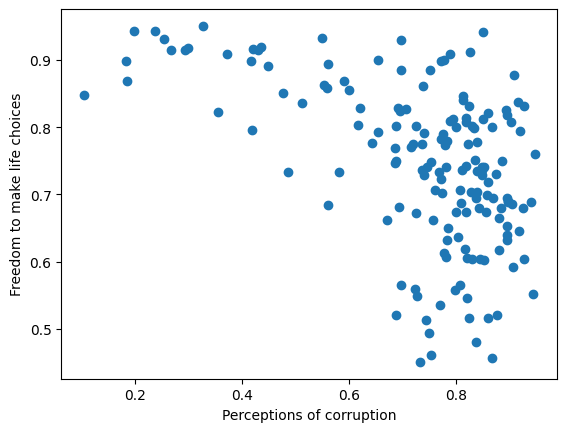

In [6]:
# Generating Correlation and Regression plot of Percentions of corruption and Freedom to make life choices

# Now you can group by 'Country name' and calculate the mean
x_values = table_df.groupby("Country name")["Perceptions of corruption"].mean()
y_values = table_df.groupby("Country name")["Freedom to make life choices"].mean()

# Drop NaN values
valid_data = pd.concat([x_values, y_values], axis=1).dropna()
x_values_clean = valid_data.iloc[:, 0]
y_values_clean = valid_data.iloc[:, 1]

correlation = st.pearsonr(x_values_clean, y_values_clean)
print(f"The correlation between Perceptions of corruption and Freedom to make life choices is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress(x_values_clean, y_values_clean)
regress_values = x_values_clean * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values_clean, y_values_clean)
# plt.plot(x_values_clean, regress_values, "r-")
# plt.annotate(line_eq, (0.1, 0.5), fontsize = 15, color="red")
plt.xlabel("Perceptions of corruption")
plt.ylabel("Freedom to make life choices")
plt.show()

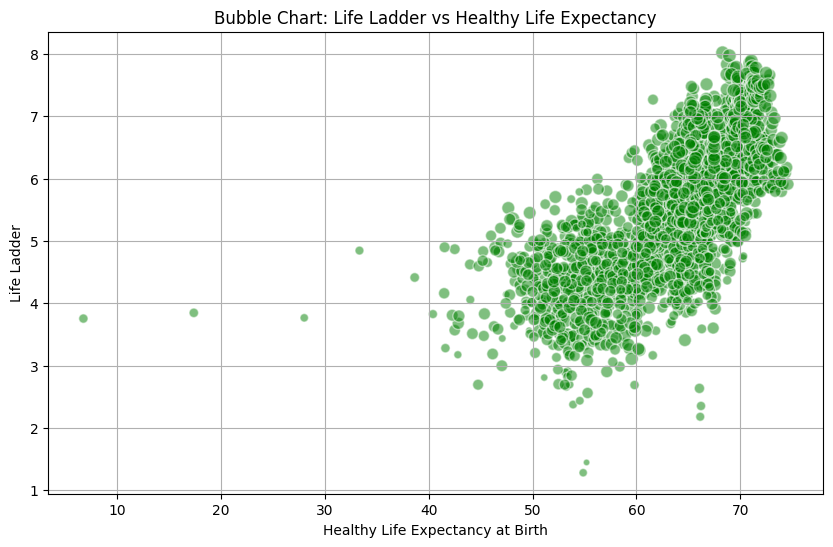

In [7]:
#Bubble chart to represent "Life Ladder" against "Healthy life expectancy at birth," where the size of the bubbles can represent "Freedom to make life choices." 

x_values = table_df["Healthy life expectancy at birth"]
y_values = table_df["Life Ladder"]
s = table_df["Freedom to make life choices"]*100  # bubble size (scaled for visibility)

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, s, alpha=0.5, c="green", edgecolors="w")

#Adding titles and labels
plt.title("Bubble Chart: Life Ladder vs Healthy Life Expectancy")
plt.xlabel("Healthy Life Expectancy at Birth")
plt.ylabel("Life Ladder")
plt.grid(True)
plt.show()


The correlation between Log GDP per capita and Life Ladder is 0.83


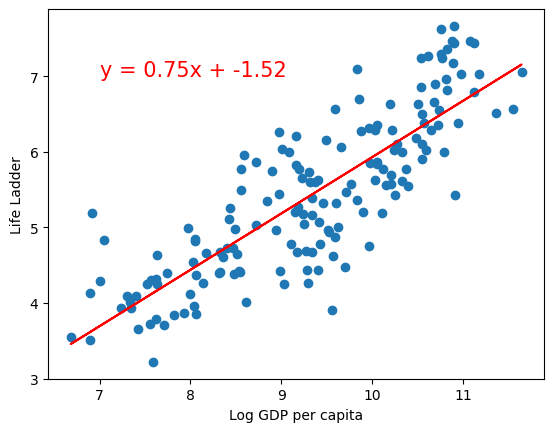

In [8]:
# Generating Correlation and Regression plot of Log GPD per capita and Life Ladder
table_df['Log GDP per capita'] = pd.to_numeric(table_df['Log GDP per capita'], errors='coerce')

# Now you can group by 'Country name' and calculate the mean
x_values = table_df.groupby("Country name")["Log GDP per capita"].mean()
y_values = table_df.groupby("Country name")["Life Ladder"].mean()

# Drop NaN values
valid_data = pd.concat([x_values, y_values], axis=1).dropna()
x_values_clean = valid_data.iloc[:, 0]
y_values_clean = valid_data.iloc[:, 1]

correlation = st.pearsonr(x_values_clean, y_values_clean)
print(f"The correlation between Log GDP per capita and Life Ladder is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress(x_values_clean, y_values_clean)
regress_values = x_values_clean * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values_clean, y_values_clean)
plt.plot(x_values_clean, regress_values, "r-")
plt.annotate(line_eq, (7,7), fontsize = 15, color="red")
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.show()

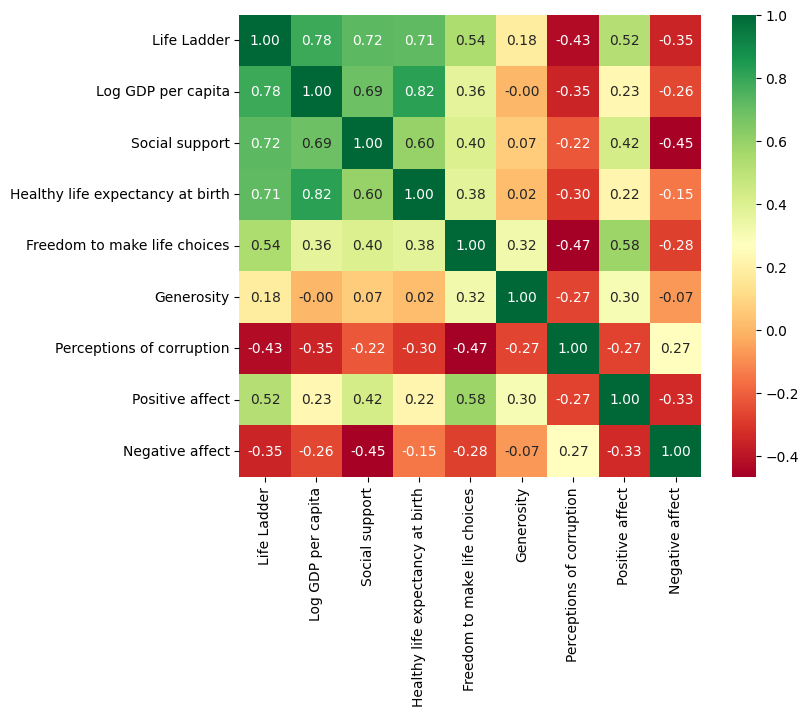

In [9]:
#Heatmap to show the correlation between "Generosity," "Perceptions of corruption," and "Positive affect." 

#Calculating the correlation matrix
corr_matrix = table_df[[
    'Life Ladder',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect',
]].corr()

#Creating the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f', square=True)
# plt.title('Correlation Heatmap')
plt.show()

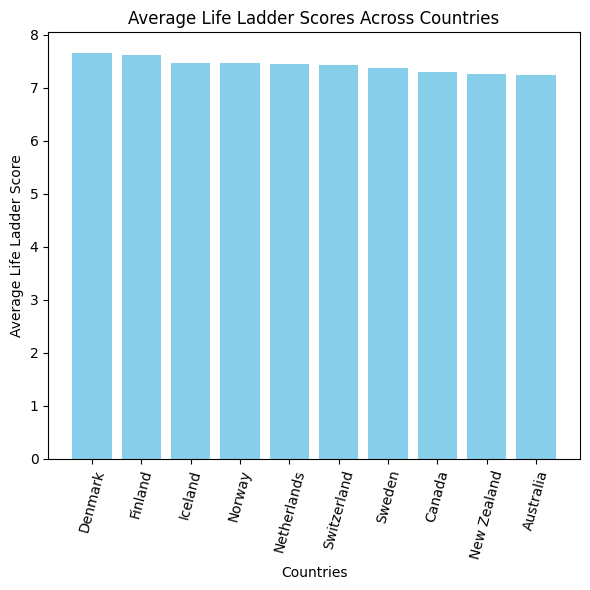

In [10]:
# Bar chart to compare average scores of "Life Ladder" across countries. 

# Calculate average scores
average_scores = table_df.groupby('Country name')['Life Ladder'].mean().reset_index()

max_10_countries = average_scores.sort_values(by='Life Ladder', ascending=False).head(10)

#Creating the bar chart top 10
x_value = max_10_countries['Country name']
y_value = max_10_countries['Life Ladder']

plt.figure(figsize=(6,6))
plt.bar( x_value, y_value, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Average Life Ladder Score')
plt.title('Average Life Ladder Scores Across Countries')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


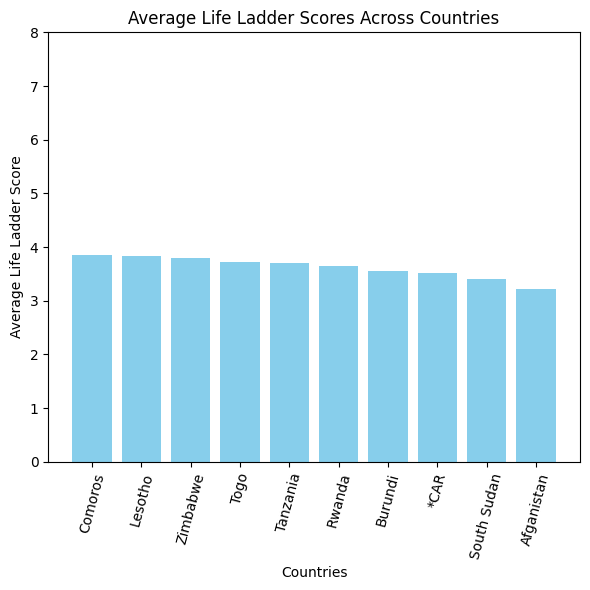

In [11]:
# Bar chart to compare average scores of "Life Ladder"  across countries. 

# Calculate average scores
average_scores = table_df.groupby('Country name')['Life Ladder'].mean().reset_index()

min_10_countries = average_scores.sort_values(by='Life Ladder', ascending=True).head(10)
min_10_countries_sorted = min_10_countries.sort_values(by='Life Ladder', ascending=False)

#Creating the bar chart top 10
x_value = min_10_countries_sorted['Country name']
y_value = min_10_countries_sorted['Life Ladder']

plt.figure(figsize=(6,6))
plt.bar( x_value, y_value, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Average Life Ladder Score')
plt.title('Average Life Ladder Scores Across Countries')
# Custom x-axis label
custom_label= ['Comoros', 'Lesotho', 'Zimbabwe','Togo', 'Tanzania', 'Rwanda', 'Burundi', '*CAR', 'South Sudan', 'Afganistan']
plt.xticks(ticks=range(len(custom_label)), labels = custom_label, rotation=75)
# plt.xticks(rotation=60)
plt.ylim(0.0, 8.0)
plt.tight_layout()
plt.show()